In [27]:
import nltk
nltk.download('punkt')#Sentence tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ronakshakari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import pandas as pd


2023-07-16 16:41:50.242121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import json

words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.csv').read()  # read csv file
intents = json.loads(data_file)  # load json file


In [5]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)# add each elements into list
        #combination between patterns and intents
        documents.append((w, intent['tag']))#add single element into end of list
        # add to tag in our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [6]:
nltk.download('wordnet') #lexical database for the English language


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ronakshakari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ronakshakari/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
import pickle
from nltk.stem import WordNetLemmatizer

# Define patterns and intents
patterns = ["pattern 1", "pattern 2", "pattern 3"]
intents = ["intent 1", "intent 2", "intent 3"]

# Lemmatize, convert to lowercase, and remove duplicates
lemmatizer = WordNetLemmatizer()
words = list(set([lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]))
words.sort()

# Sort classes
classes.sort()

# Combine patterns and intents into documents
documents = list(zip(patterns, intents))

# Print information
print(len(documents), "documents\n", documents, "\n")
print(len(classes), "classes\n", classes, "\n")
print(len(words), "unique lemmatized words\n", words, "\n")

# Save words and classes to pickle files
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))



3 documents
 [('pattern 1', 'intent 1'), ('pattern 2', 'intent 2'), ('pattern 3', 'intent 3')] 

38 classes
 ['admission', 'canteen', 'college intake', 'committee', 'computerhod', 'course', 'creator', 'document', 'event', 'extchod', 'facilities', 'fees', 'floors', 'goodbye', 'greeting', 'hod', 'hostel', 'hours', 'infrastructure', 'ithod', 'library', 'location', 'menu', 'name', 'number', 'placement', 'principal', 'ragging', 'random', 'salutaion', 'scholarship', 'sem', 'sports', 'swear', 'syllabus', 'task', 'uniform', 'vacation'] 

263 unique lemmatized words
 ["'s", '(', ')', 'a', 'about', 'ac', 'active', 'activity', 'address', 'admision', 'admission', 'against', 'ai/ml', 'allotment', 'am', 'an', 'and', 'antiragging', 'any', 'anyone', 'are', 'as', 'asshole', 'at', 'attend', 'automobile', 'available', 'average', 'be', 'between', 'big', 'bitch', 'book', 'boy', 'branch', 'bring', 'building', 'by', 'bye', 'cafetaria', 'call', 'called', 'campus', 'can', 'canteen', 'capacity', 'case', 'casual

Training Model


In [11]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words
    pattern_words = doc[0]
    # convert pattern_words in lower case
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create bag of words array,if word match found in current pattern then put 1 otherwise 0.[row * colm(263)]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # in output array 0 value for each tag ang 1 value for matched tag.[row * colm(8)]
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle training and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test. X - patterns(words), Y - intents(tags)
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")


Training data created


In [12]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

Build the model


In [13]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
print("First layer:",model.layers[0].get_weights()[0])

First layer: [[-0.03322289 -0.03990383 -0.11600119 ... -0.01941951  0.01124783
   0.02257346]
 [-0.10931151  0.10510738 -0.04942558 ... -0.1120735  -0.10808669
   0.11969741]
 [ 0.07204159 -0.00454888 -0.01526181 ...  0.0169085   0.03117843
  -0.0356227 ]
 ...
 [ 0.01276533  0.05453765  0.09663177 ...  0.07484715 -0.06929836
   0.00346293]
 [ 0.01758313  0.01980233 -0.01856777 ...  0.08705106 -0.00191651
  -0.01963907]
 [ 0.08195095  0.06058785  0.08478691 ... -0.05849147  0.05417065
   0.04830106]]


2023-07-16 16:49:06.677310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/200
1/1 [==============================] - 1s 714ms/step - loss: 1.1249 - accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 1.0495 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 1.0967 - accuracy: 0.6667
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 1.1067 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 1.0990 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1103 - accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0700 - accuracy: 0.3333
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.9983 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0188 - accuracy: 0.6667
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1227 - accuracy: 0.3333
Epoch 11/200
1/1 [=

1/1 [==============================] - 0s 7ms/step - loss: 1.0786 - accuracy: 0.3333
Epoch 84/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2134 - accuracy: 0.0000e+00
Epoch 85/200
1/1 [==============================] - 0s 17ms/step - loss: 1.2122 - accuracy: 0.0000e+00
Epoch 86/200
1/1 [==============================] - 0s 11ms/step - loss: 1.0930 - accuracy: 0.3333
Epoch 87/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1450 - accuracy: 0.3333
Epoch 88/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0837 - accuracy: 0.3333
Epoch 89/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1201 - accuracy: 0.3333
Epoch 90/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0565 - accuracy: 0.6667
Epoch 91/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1858 - accuracy: 0.0000e+00
Epoch 92/200
1/1 [==============================] - 0s 31ms/step - loss: 1.1068 - accuracy: 0.3333
Epoch 93/200
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 1.0477 - accuracy: 0.6667
Epoch 165/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0923 - accuracy: 0.3333
Epoch 166/200
1/1 [==============================] - 0s 7ms/step - loss: 1.1018 - accuracy: 0.3333
Epoch 167/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0978 - accuracy: 0.6667
Epoch 168/200
1/1 [==============================] - 0s 8ms/step - loss: 1.0953 - accuracy: 0.6667
Epoch 169/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1391 - accuracy: 0.0000e+00
Epoch 170/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1032 - accuracy: 0.3333
Epoch 171/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1438 - accuracy: 0.3333
Epoch 172/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0286 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0964 - accuracy: 0.3333
Epoch 174/200
1/1 [

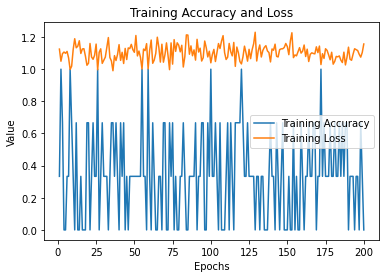

In [16]:
import matplotlib.pyplot as plt

accuracy = hist.history['accuracy']
loss = hist.history['loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Training Accuracy")
plt.plot(epochs, loss, label="Training Loss")

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy and Loss')
plt.legend()

plt.show()
